In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [3]:
#make llm
llm = ChatOpenAI(model = 'gpt-4o')

In [4]:
#make template using chatprompttemplate
prompt = ChatPromptTemplate.from_template('Tell me a short joke about {topic}')

In [5]:
#parser
parser = StrOutputParser()

In [ ]:
#chain 

chain = prompt|llm|parser
chain.invoke({'topic':'ai'})

In [1]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
llm = ChatOpenAI(model = 'gpt-4o')
template = ChatPromptTemplate.from_template('what is the meaning of {topic}')
parser = StrOutputParser()

chain = template|llm|parser
chain.invoke({'topic':'life'})

"The meaning of life is a profound philosophical question that has been pondered for centuries. Different perspectives offer different answers:\n\n1. **Philosophical Perspectives**: Philosophers have explored various meanings, from seeking happiness and fulfilling one's potential to finding purpose through actions and relationships.\n\n2. **Religious Views**: Many religions propose specific purposes or paths, such as serving God, achieving enlightenment, or living ethically.\n\n3. **Scientific View**: From a biological standpoint, the purpose might be to survive, reproduce, and pass on genes.\n\n4. **Personal Interpretation**: Many people believe the meaning of life is subjective and varies from person to person. It might involve pursuing passions, contributing to society, or simply enjoying life's experiences.\n\nIn essence, the meaning of life can be as diverse as the individuals pondering it, often combining elements of personal beliefs, cultural values, and individual goals."

In [9]:
print(template)

input_variables=['topic'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='what is the meaning of {topic}'), additional_kwargs={})]


In [10]:
chain1 = template|llm

In [15]:
print(chain1.invoke('contraflecture in simple terms without any jargons'))

content='"Contraflexure" refers to a point on a beam or a structure where it changes from bending in one direction to bending in the opposite direction. You can think of it like a seesaw: one side goes up while the other goes down, and the contraflexure point would be where it switches direction.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 23, 'total_tokens': 88, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_64dfa806c7', 'id': 'chatcmpl-D8gf6Z5W5YcK6jvm95N0bRdl7tHAx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--019c559e-a9b0-7080-91ac-eafad0ea6f56-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 23, 'output_tokens

In [ ]:
template_message = ChatPromptTemplate.from_messages([('system','you are a helpful {profession}')
,('human','what is the meaning of {topic}')
])
# chain3 = template_message|llm|parser
# chain3.invoke({'profession':'doctor','topic':'cardic arrest and heart attack in simple terms without any jargons'})

In [18]:
chain3 = template_message|llm|parser

In [20]:
chain3.invoke({'profession':'doctor','topic':'cardic arrest and heart attack in simple terms without any jargons'})

"Of course! Let's break it down:\n\n- **Cardiac Arrest**: This is when the heart suddenly stops beating. When this happens, blood stops flowing to the brain and other vital organs. It's a serious emergency and requires immediate attention, often with CPR (cardiopulmonary resuscitation) and defibrillation to try to restart the heart.\n\n- **Heart Attack**: This happens when blood flow to a part of the heart is blocked. This can damage that part of the heart because it doesn't get enough oxygen. Unlike cardiac arrest, the heart usually doesn't stop beating during a heart attack, but it's a warning that something's wrong and needs medical help quickly.\n\nIn short, a cardiac arrest is when the heart stops, and a heart attack is a blockage that can harm the heart but doesn't necessarily stop it from beating."

In [2]:
from langchain_core.tools import tool

In [13]:
@tool

def multiply(a:float, b:float)->float:
    """
    Multiply two numbers together"""
    return a*b

In [14]:
llm_with_tools = llm.bind_tools([multiply])

In [19]:
result = llm_with_tools.invoke('What is 5 times 8?')

In [20]:
result.tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 8},
  'id': 'call_L4qCkJ9jlMmpMwTuY5sJLSl8',
  'type': 'tool_call'}]

In [27]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import tools_condition, ToolNode
from typing import Annotated, TypedDict, List
from langchain_core.messages import AnyMessage
import operator
from IPython.display import Image, display

In [32]:
class State(TypedDict):
    messages: Annotated[List[AnyMessage],operator.add]

def reasoner(state):
    return {'messages':[llm_with_tools.invoke(state['messages'])]}


builder = StateGraph(State)

#add nodes
builder.add_node('reasoner',reasoner)
builder.add_node('tools',ToolNode([multiply]))
builder.add_edge(START,'reasoner')
builder.add_conditional_edges('reasoner',tools_condition)
builder.add_edge('tools','reasoner')

graph = builder.compile()


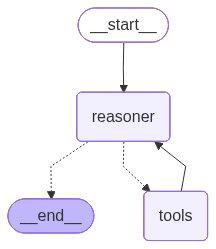

In [33]:
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
result = graph.invoke({'messages':['multiply 2 and 8']})